In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cleaned_autos.csv")

In [3]:
pd.set_option('display.max_columns', None)
df.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,golf,150000,Jan,Gasoline,volkswagen,Other,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,Other,125000,May,Diesel,audi,Yes,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,grand,125000,Aug,Diesel,jeep,Other,2016-03-14 00:00:00,90480,2016-04-05 12:47:46,2016,2016,March,March,22,12,12,4


In [4]:
df.shape

(313687, 27)

In [5]:
df.vehicleType.unique()

array(['Other', 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio',
       'kombi', 'bus', 'andere'], dtype=object)

## Variation of the price range by the vehicle type

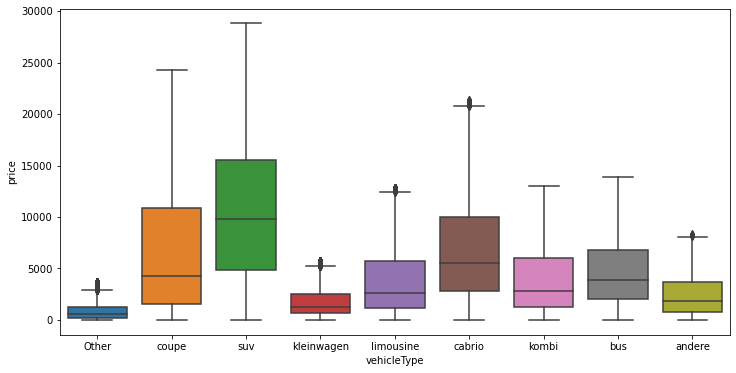

In [6]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x="vehicleType", y="price", data=df)
plt.show()

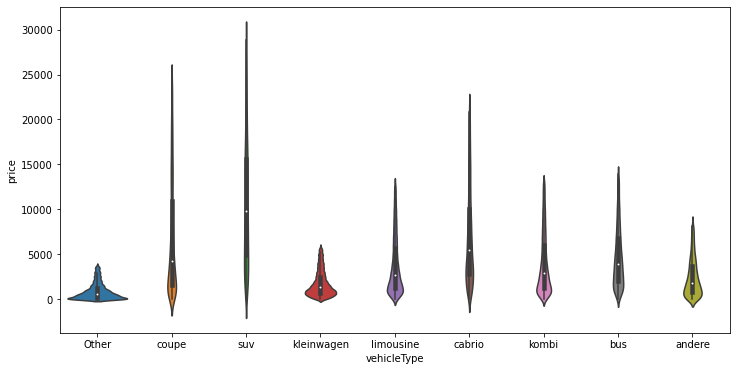

In [7]:
fig, ax = plt.subplots(figsize=(12,6))
sns.violinplot(x="vehicleType", y="price", data=df)
plt.show()

## Demonstration of the mean pricec by the vehicle type

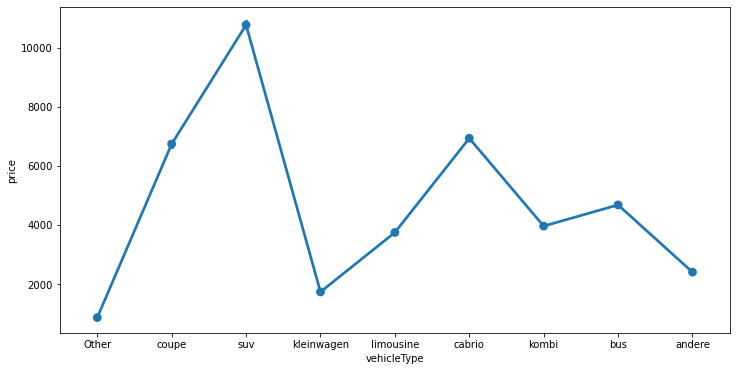

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
sns.pointplot(x="vehicleType", y="price", data=df)
#ax.set_xticklabels(df.vehicleType.unique(), rotation=90);

In [9]:
order=df.groupby("vehicleType").price.mean().sort_values(ascending=False).index

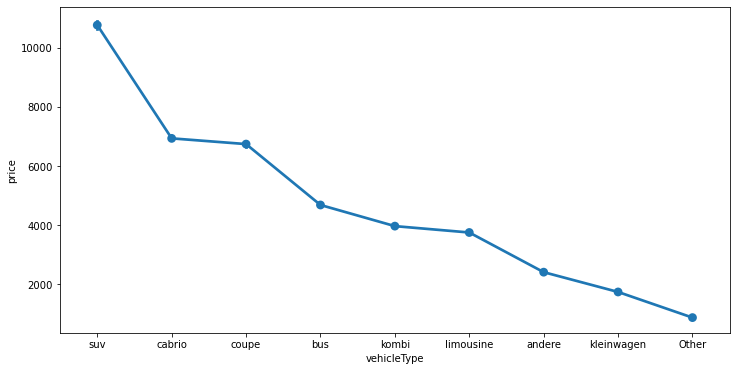

In [10]:
fig, ax = plt.subplots(figsize=(12,6))
sns.pointplot(x="vehicleType", y="price", order=order, data=df)

## Total count of vehicles by type available on ebay for sale

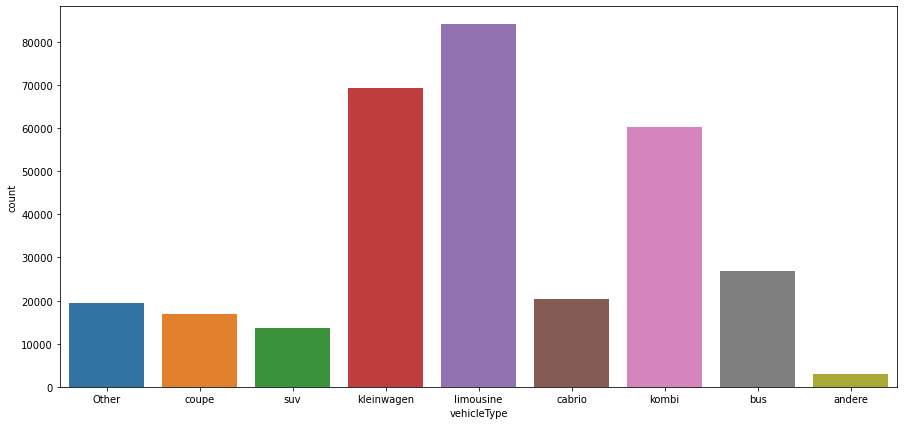

In [11]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(df.vehicleType)

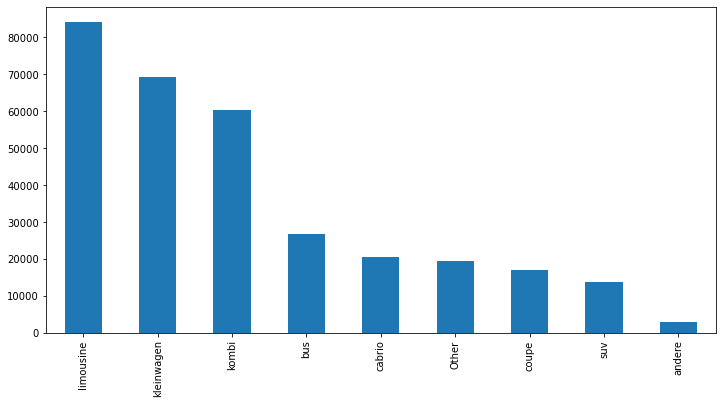

In [12]:
#pandas
df.vehicleType.value_counts().plot.bar(figsize=(12,6))

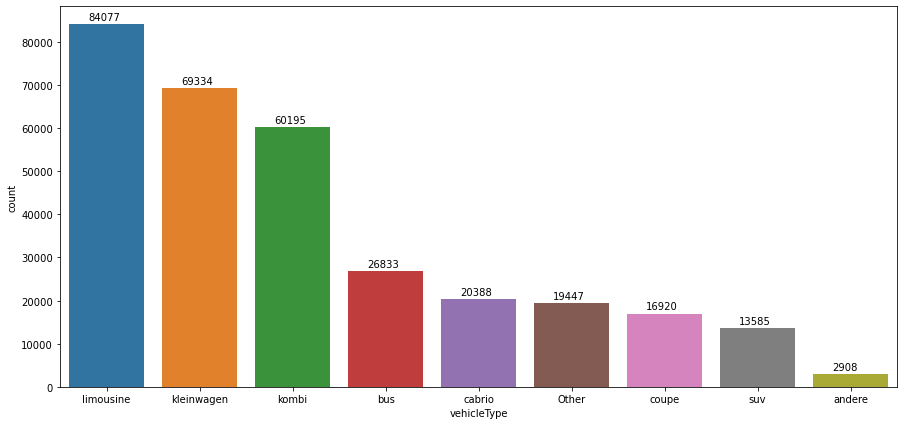

In [13]:
fig, ax = plt.subplots(figsize=(15, 7))
g=sns.countplot(df.vehicleType, order=df.vehicleType.value_counts().index)

for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+1000))

In [14]:
x=df.vehicleType.value_counts()

In [15]:
x.index

Index(['limousine', 'kleinwagen', 'kombi', 'bus', 'cabrio', 'Other', 'coupe',
       'suv', 'andere'],
      dtype='object')

In [16]:
x.values

array([84077, 69334, 60195, 26833, 20388, 19447, 16920, 13585,  2908],
      dtype=int64)

<BarContainer object of 9 artists>

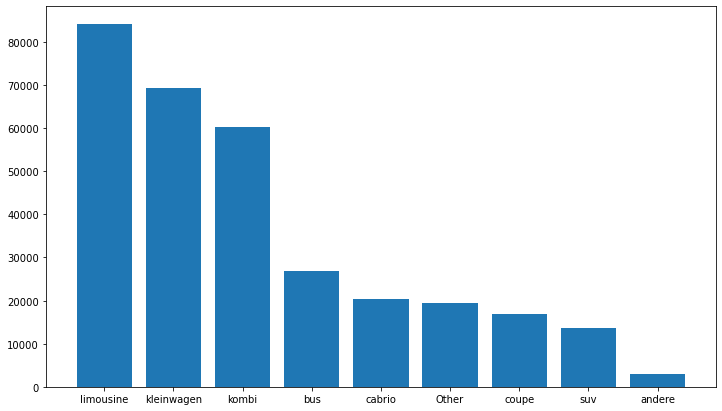

In [17]:
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(x.index, x.values)

## Average price for vehicles based on the type of vehicle as well as on the type of gearbox

In [18]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,golf,150000,Jan,Gasoline,volkswagen,Other,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,Other,125000,May,Diesel,audi,Yes,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,grand,125000,Aug,Diesel,jeep,Other,2016-03-14 00:00:00,90480,2016-04-05 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,golf,150000,Jul,Gasoline,volkswagen,No,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,fabia,90000,Jul,Diesel,skoda,No,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


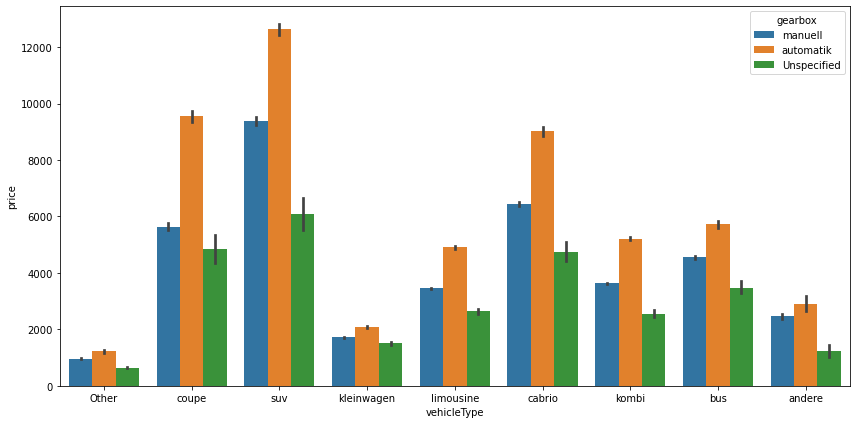

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x="vehicleType", y="price", hue="gearbox", data=df)
plt.tight_layout()

## Average price for vehicles by fuel type as well as on the type of gearbox

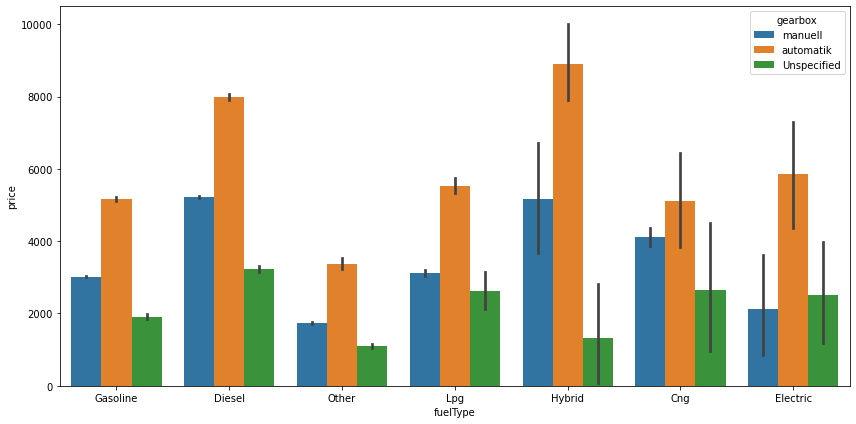

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x="fuelType", y="price", hue="gearbox", data=df)
plt.tight_layout()

## heatmap

In [26]:
trial = pd.DataFrame()
for b in list(df["brand"].unique()):
    for v in list(df["vehicleType"].unique()):
        z = df[(df["brand"] == b) & (df["vehicleType"] == v)]["price"].mean()
        trial = trial.append(pd.DataFrame({'brand':b , 'vehicleType':v , 'avgPrice':z}, index=[0]))
trial = trial.reset_index()
del trial["index"]
trial["avgPrice"].fillna(0,inplace=True)
trial["avgPrice"].isnull().value_counts()
trial["avgPrice"] = trial["avgPrice"].astype(int)
trial.head(5)

,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743


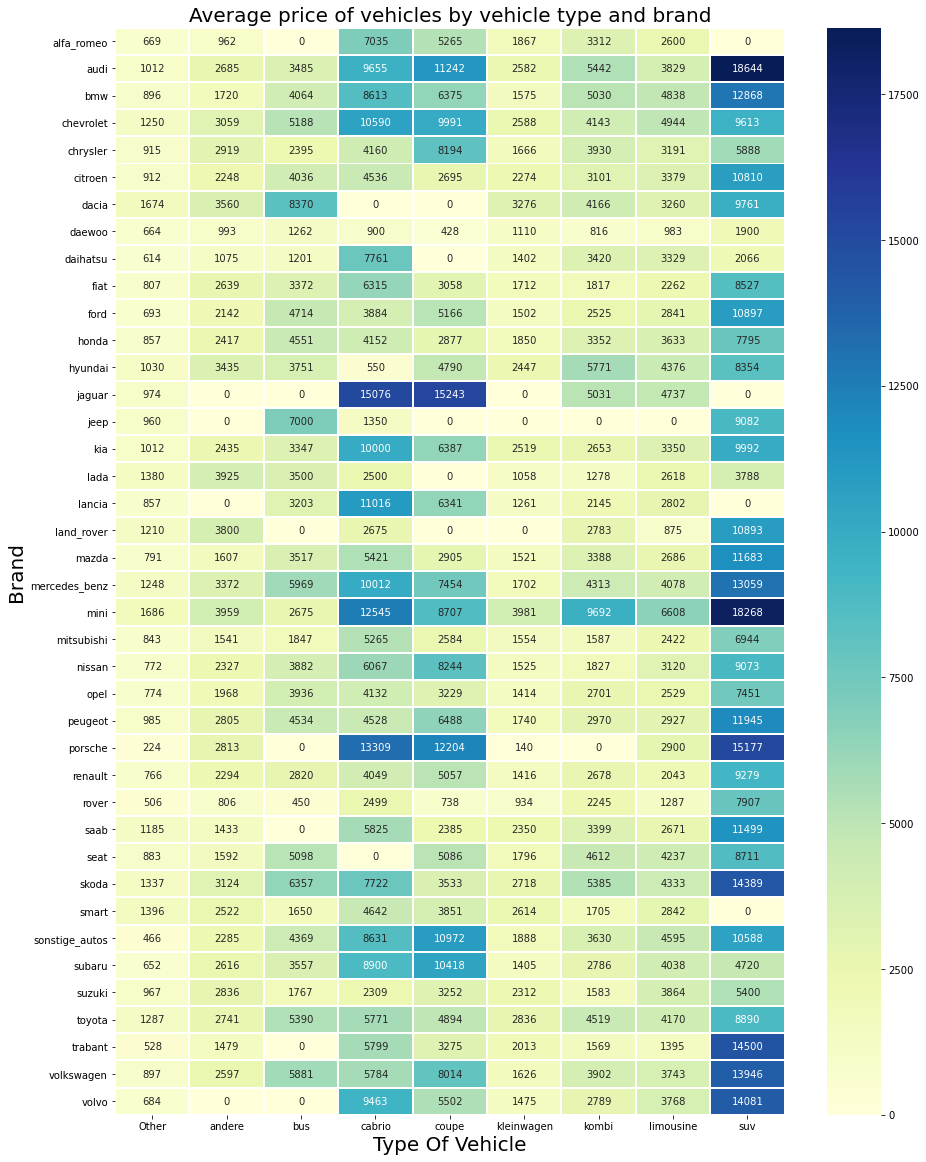

In [27]:
# HeatMap tp show average prices of vehicles by brand and type together
tri = trial.pivot("brand","vehicleType", "avgPrice")
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri,linewidths=1,cmap="YlGnBu",annot=True, ax=ax, fmt="d")
ax.set_title("Average price of vehicles by vehicle type and brand",fontdict={'size':20})
ax.xaxis.set_label_text("Type Of Vehicle",fontdict= {'size':20})
ax.yaxis.set_label_text("Brand",fontdict= {'size':20})
plt.show()

In [28]:
pd.DataFrame(df.groupby(["vehicleType", "brand"]).price.mean())

price
vehicleType brand                   
Other       alfa_romeo    669.805556
            audi         1012.599251
            bmw           896.748086
            chevrolet    1250.135593
            chrysler      915.701299
...                              ...
suv         suzuki       5400.337766
            toyota       8890.557173
            trabant     14500.000000
            volkswagen  13946.283675
            volvo       14081.237918

[333 rows x 1 columns]